In [44]:
#import statements
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

import time
import math
from scipy.spatial import distance

In [92]:
#upload data
#https://www.kaggle.com/datasnaek/youtube-new?select=GB_category_id.json
DEvideos = pd.read_csv("DEvideos.csv", sep=',')
print(DEvideos.head())

students = pd.read_csv("students_info.csv", sep=',')



      video_id trending_date  \
0  LgVi6y5QIjM      17.14.11   
1  Bayt7uQith4      17.14.11   
2  1ZAPwfrtAFY      17.14.11   
3  AHtypnRk7JE      17.14.11   
4  ZJ9We4bjcg0      17.14.11   

                                               title            channel_title  \
0  Sing zu Ende! | Gesangseinlagen vom Feinsten |...                inscope21   
1  Kinder ferngesteuert im Kiosk! Erwachsene abzo...  LUKE! Die Woche und ich   
2  The Trump Presidency: Last Week Tonight with J...          LastWeekTonight   
3                                Das Fermi-Paradoxon        100SekundenPhysik   
4           18 SONGS mit Kelly MissesVlog (Sing-off)                     rezo   

   category_id              publish_time  \
0           24  2017-11-13T17:08:49.000Z   
1           23  2017-11-12T22:30:01.000Z   
2           24  2017-11-13T07:30:00.000Z   
3           27  2017-11-12T15:00:01.000Z   
4           24  2017-11-12T13:10:36.000Z   

                                                tags   

In [55]:
#make mean shifting function

def meanshifting(groupdata_np, r):
    #groupdata is all the point in a single group
    #r is the radius of the window
    
    
    #starting center
    
    
    rows = groupdata_np.shape[0]
    index = np.random.choice(rows, size=1, replace=False) 
    center = groupdata_np[index[0],:]
 
    
    
    center_np = np.zeros((2000, 2))
    center_np[0,:] = center
   
    
    #looping through the process a set number of times
    for val in range(2000):
        
        #calculating distances between center point and other points and placing them in new group
        
        close_groupx = []
        close_groupy = []
        
        
        
        #looping through num of data points
        
        for ind in range(len(groupdata_np[:,0])):
            #finding dists and sorting ones closest
           
            a = center[0] - groupdata_np[ind, 0]
            b = center[1] - groupdata_np[ind, 1]
            
          
            dist = math.sqrt((a**2) + (b**2))
          
            if dist <= r:
                close_groupx.append(groupdata_np[ind,0])
                close_groupy.append(groupdata_np[ind,1])
                
       
        close_group_mean = np.zeros(2)        
        close_group_mean[0] = np.mean(close_groupx)                       
        close_group_mean[1] = np.mean(close_groupy)
        
      
        if close_group_mean[0] == center[0] and close_group_mean[1] == center[1]:
            break
            
        center = close_group_mean
        center_np[val,:] = center
    to_delete = []   
    for ind in range(len(center_np)):
        if center_np[ind,0] == 0:
            to_delete.append(ind)
            
    center_np = np.delete(center_np, to_delete, 0)
            
            
            
            
            
    print('center =', center)
    print('centernp =', center_np)
    return [center, center_np]



            
        
        
    
    
    
    
    


In [99]:

sleep_coff = students.loc[:, ['sleep', 'coffee']]
sleep_coff_np = sleep_coff.to_numpy()


km_alg = KMeans(n_clusters=2, init="random",random_state = 1, max_iter = 200)
fit1 = km_alg.fit(sleep_coff_np)
kmeans_labels = fit1.labels_
kmeans_centers = fit1.cluster_centers_



DEvideos = DEvideos.loc[:, ['category_id', 'views', 'likes', 'dislikes', 'comment_count']]
DEvideos_np = DEvideos.to_numpy()


km_alg_DE = KMeans(n_clusters=2, init="random",random_state = 1, max_iter = 200)
fit_DE = km_alg_DE.fit(DEvideos_np[:,:2])
kmeans_labels_DE = fit_DE.labels_
kmeans_centers_DE = fit_DE.cluster_centers_

print(kmeans_labels_DE)

[0 0 0 ... 0 0 0]


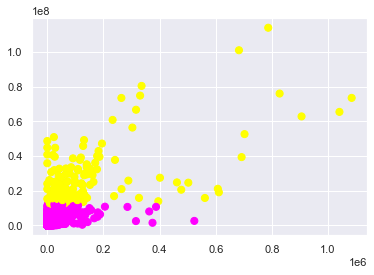

In [104]:
# Plot and color the points according to their label
plt.scatter(DEvideos_np[:,4], DEvideos_np[:,1], c=kmeans_labels_DE, s=50, cmap="spring")
# Add the cluster centers on top
#plt.scatter(kmeans_centers_DE[:, 0], kmeans_centers_DE[:, 1], c='black', marker="x", s=200, alpha=0.75)

In [86]:
#apply mean shifting to the groups
label0inds = []
label1inds = []

for ind in range(len(kmeans_labels)):
    
    val = kmeans_labels[ind]
    
    if val == 0:
        label0inds.append(ind)
        
    if val == 1:
        label1inds.append(ind)
        
group0 = sleep_coff_np[label0inds, :]

group1 = sleep_coff_np[label1inds, :]


center0 = meanshifting(group0, 2)

center1 = meanshifting(group1, 2)


center = [5.164  1.1208]
centernp = [[5.22830508 1.16610169]
 [5.17741935 1.11209677]
 [5.164      1.1208    ]]
center = [7.19385057 1.21034483]
centernp = [[7.20417143 1.21657143]
 [7.19385057 1.21034483]]


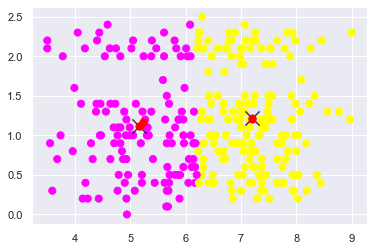

In [87]:
#graphing results


# Plot and color the points according to their label
plt.scatter(sleep_coff_np[:,0], sleep_coff_np[:,1], c=kmeans_labels, s=50, cmap="spring")
# Add the cluster centers on top
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', marker="x", s=200, alpha=0.75)


centers0 = center0[1]
plt.scatter(centers0[:,0], centers0[:,1], c='red', s=50)

centers1 = center1[1]
plt.scatter(centers1[:,0], centers1[:,1], c='red', s=50)
